In [51]:
!ls

Housing.csv            house_pred_model.ipynb


In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Set Pandas display options to show all columns
pd.set_option('display.max_columns', None)

In [55]:
!ls

Housing.csv            house_pred_model.ipynb


In [56]:
df = pd.read_csv('Housing.csv')

In [57]:
#1_1. shape This is to know the number of rows and columns - shape of the data
df.shape

(545, 13)

In [58]:
#1_2. df.info(). This is know the number of non-null entries, # of columns, datatypes & memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


This output provides you with an overview of the DataFrame, such as the number of rows and columns, the column 
names, the data types, and memory usage. 
It's a handy tool for quickly understanding the structure of your dataset and identifying any missing values or
potential data type issues.

In [59]:
#1_3 df.head() - This is used to display the first five records.
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [60]:
#1_4. df.head().transpose()

df.head().transpose()

,0,1,2,3,4
price,13300000,12250000,12250000,12215000,11410000
area,7420,8960,9960,7500,7420
bedrooms,4,4,3,4,4
bathrooms,2,4,2,2,1
stories,3,4,2,2,2
mainroad,yes,yes,yes,yes,yes
guestroom,no,no,no,no,yes
basement,no,no,yes,yes,yes
hotwaterheating,no,no,no,no,no
airconditioning,yes,yes,no,yes,yes


In this above example, df.head() is applied to the DataFrame first, showing the first 5 rows. 
Then, df.transpose() is applied to the result, swapping the rows and columns of those 5 rows. 
This can be useful when you want to examine the initial data points across columns more closely.

In [61]:
#1_5 df.tail - displays the bottom 5 rows
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


We can adjust the number of rows displayed by passing the desired number as an argument to df.tail(). 
For example, df.tail(10) would show the last 10 rows of the DataFrame, and 
df.tail(1) would display only the very last row.

This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in
the DataFrame. 
It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [62]:
#2_1.Type Casting (astype) 

In [63]:
#3 - Missing Value Treatment

In [64]:
#3_1 -  use isnull() to check for missing values
# sum(): gives the sum of missing values in each column
missing_values = df.isnull().sum()

# print the missing values
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [65]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
price,0,0.0,int64
area,0,0.0,int64
bedrooms,0,0.0,int64
bathrooms,0,0.0,int64
stories,0,0.0,int64
mainroad,0,0.0,object
guestroom,0,0.0,object
basement,0,0.0,object
hotwaterheating,0,0.0,object
airconditioning,0,0.0,object


In [66]:
#4_1_1. Five point summary - df.describe()
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


This summary is helpful for understanding the central tendency, spread, and distribution of the numeric data in the DataFrame. It provides insights into the dataset's characteristics, which can be useful for data analysis and exploration.

In [67]:
#4_1_2. Five point summary for categorical columns - /include = object for categorical - Five Point Summary
df.describe(include=object)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [68]:
#4_1_2. Five point summary for categorical columns
df.describe(exclude=np.number)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [69]:
# check the categories of the variable 'mainroad' 
print('Categories in mainroad:', df.mainroad.unique())

Categories in mainroad: ['yes' 'no']


In [70]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [71]:
# check the categories of the variable 'guestroom' 
print('Categories in guestroom:', df.guestroom.unique())

Categories in guestroom: ['no' 'yes']


In [72]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [73]:
# check the categories of the variable 'Item_Type' 
print('Categories in Item_Type:', df.basement.unique())

Categories in Item_Type: ['no' 'yes']


In [74]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [75]:
# check the categories of the variable 'hotwaterheating' 
print('Categories in hotwaterheating:', df.hotwaterheating.unique())

Categories in hotwaterheating: ['no' 'yes']


In [76]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [77]:
# check the categories of the variable 'airconditioning' 
print('Categories in airconditioning:', df.airconditioning.unique())

Categories in airconditioning: ['yes' 'no']


In [78]:
df.airconditioning.value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

In [79]:
# check the categories of the variable 'prefarea' 
print('Categories in prefarea:', df.prefarea.unique())

Categories in prefarea: ['yes' 'no']


In [80]:
df.prefarea.value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

In [81]:
# check the categories of the variable 'furnishingstatus' 
print('Categories in furnishingstatus:', df.furnishingstatus.unique())

Categories in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [82]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [83]:
# calculate the variance
var = df.var(numeric_only=True)

# rounding off the values upto 3 decimals
round(var, 6)

price        3.498544e+12
area         4.709512e+06
bedrooms     5.447380e-01
bathrooms    2.524760e-01
stories      7.525430e-01
parking      7.423300e-01
dtype: float64

The variance indicates how much is the data varying from the mean. 
The output suggests that the variable bathrooms has the least variance and the variable price has the maximum variance.

In [84]:
df.std(numeric_only=True)

price        1.870440e+06
area         2.170141e+03
bedrooms     7.380639e-01
bathrooms    5.024696e-01
stories      8.674925e-01
parking      8.615858e-01
dtype: float64

Interpretation: We can see that the variable 'bathrooms' has a standard deviation near to zero. 
It indicates that there is not much variability. 
Thus this variable does not add much value to the analysis and can be further removed from the study.
However, it is not sensible to compare variation in variables having different units because they vary in their respective units and the means about which they occur.

In [85]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

In [86]:
df_num.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

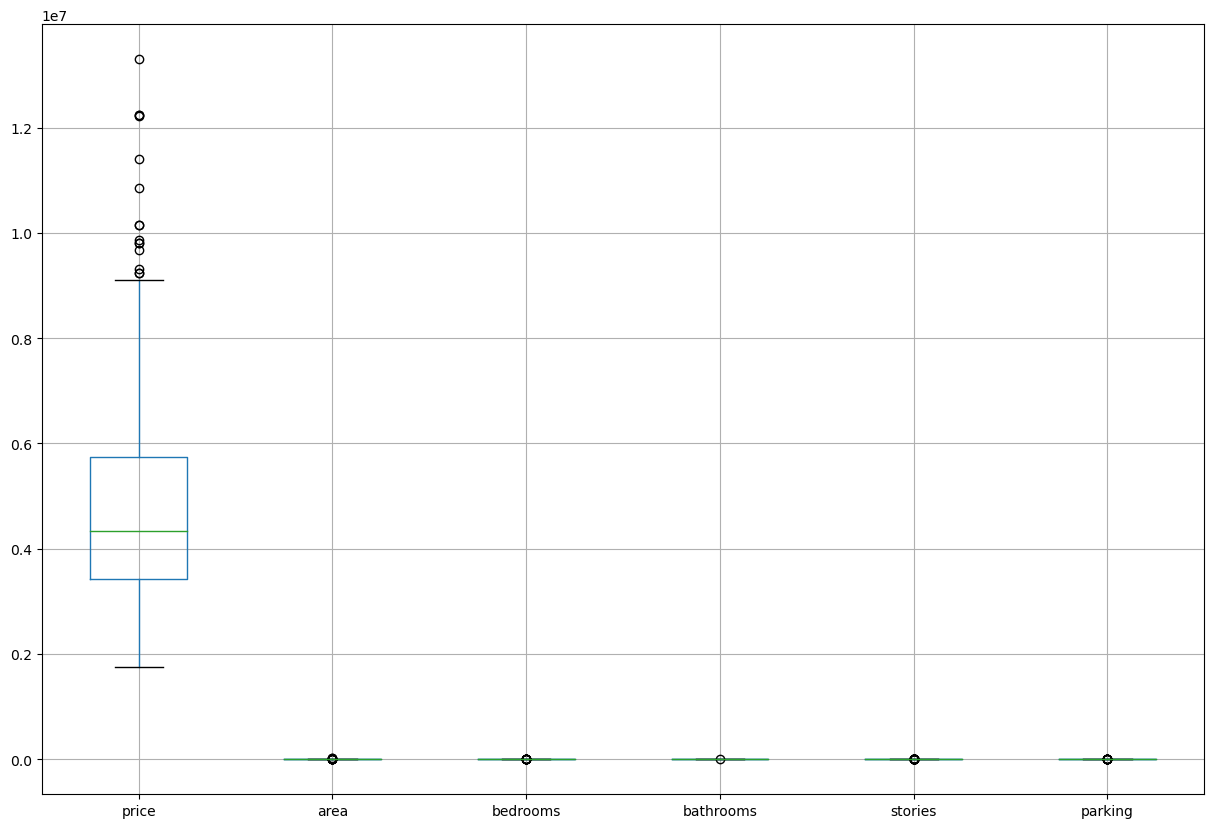

In [88]:
df_num.boxplot()
plt.show()

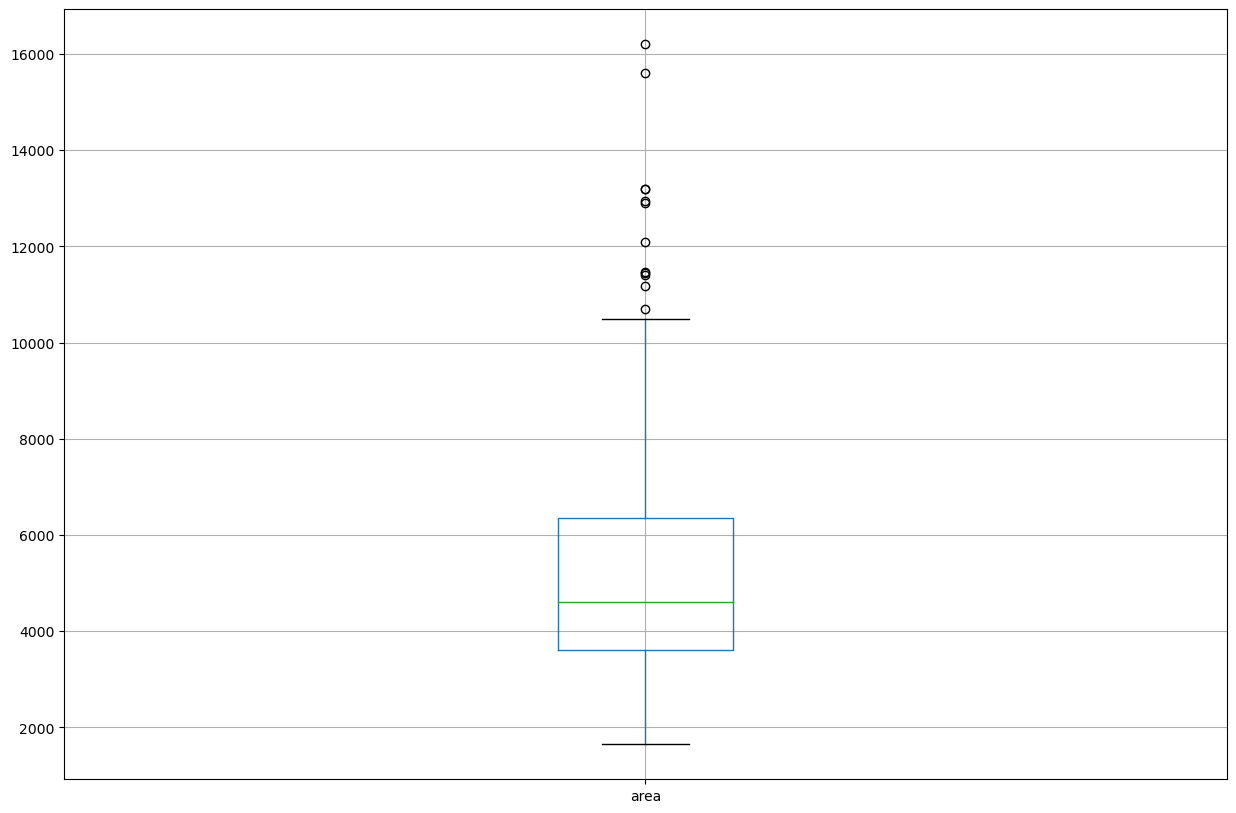

In [89]:
df_num.boxplot(column='area')
plt.show()

In [90]:
# filter the categorical variables from the data
df_cat = df.select_dtypes(exclude = np.number)
df_cat.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [91]:
# find the range
print(df_num.quantile(0.75)-df_num.quantile(0.25))

price        2310000.0
area            2760.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
parking            1.0
dtype: float64


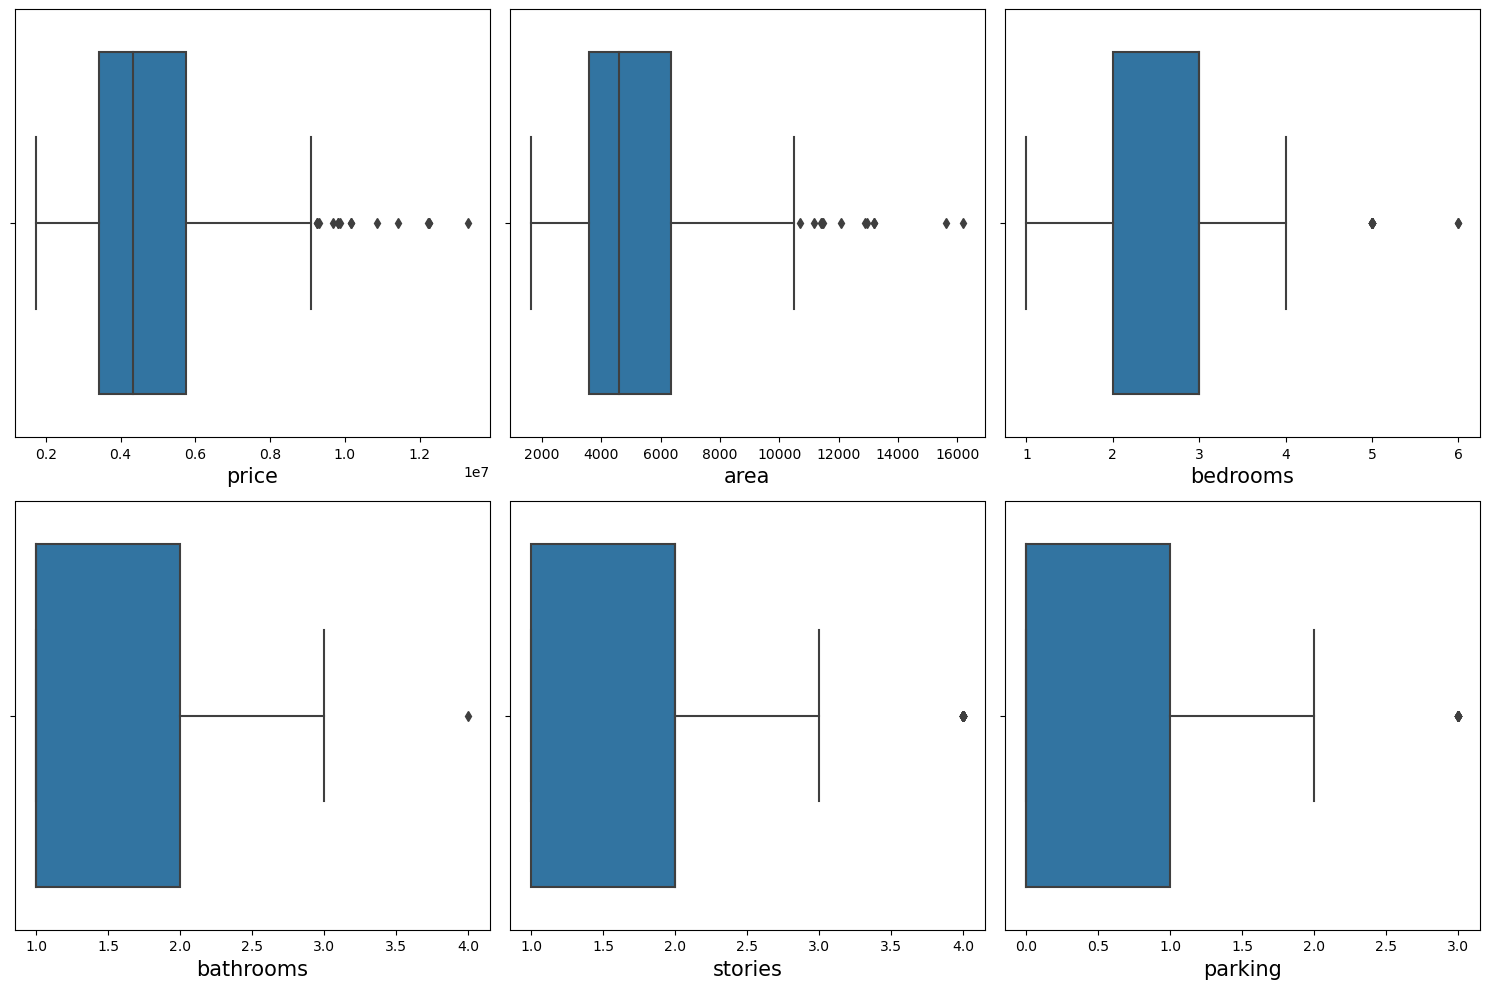

In [92]:
#4_2_1 - This is to visualize the distribution of numeric data through box plots.

import seaborn as sns
import matplotlib.pyplot as plt

# Filter the numeric columns from your DataFrame
df_num = df.select_dtypes(include=['int64'])

# Create a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the numeric columns and their corresponding subplots
for column, subplot in zip(df_num.columns, axes.flatten()):
    sns.boxplot(x=df[column], ax=subplot)
    subplot.set_xlabel(column, fontsize=15)

plt.tight_layout()
plt.show()

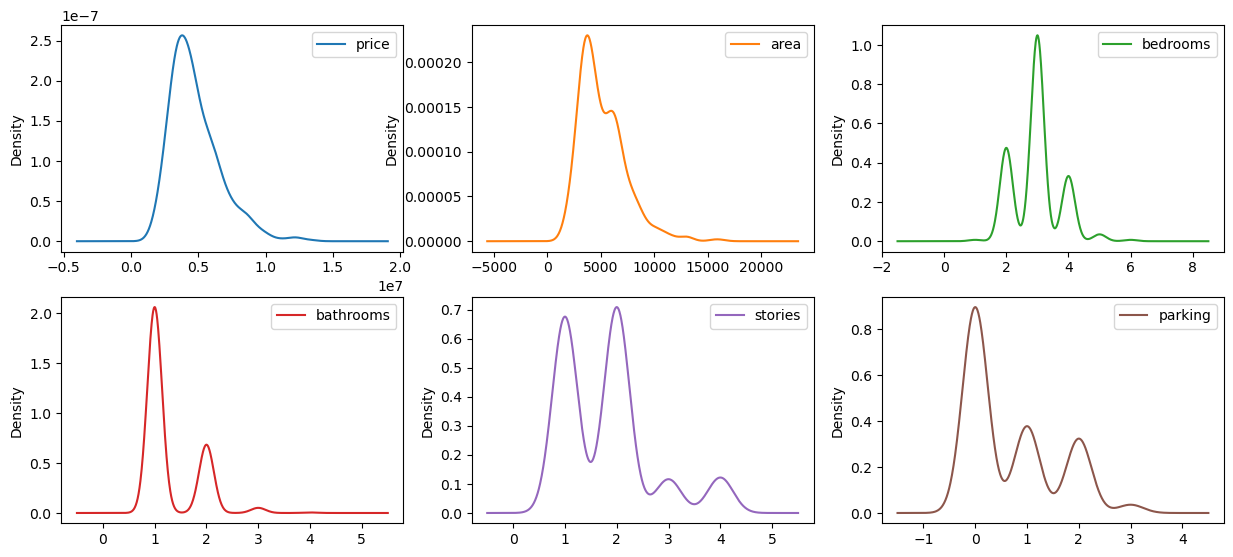

In [93]:
#4_2_2 - This is to visualize the distribution of variables in a DataFrame using density plots
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

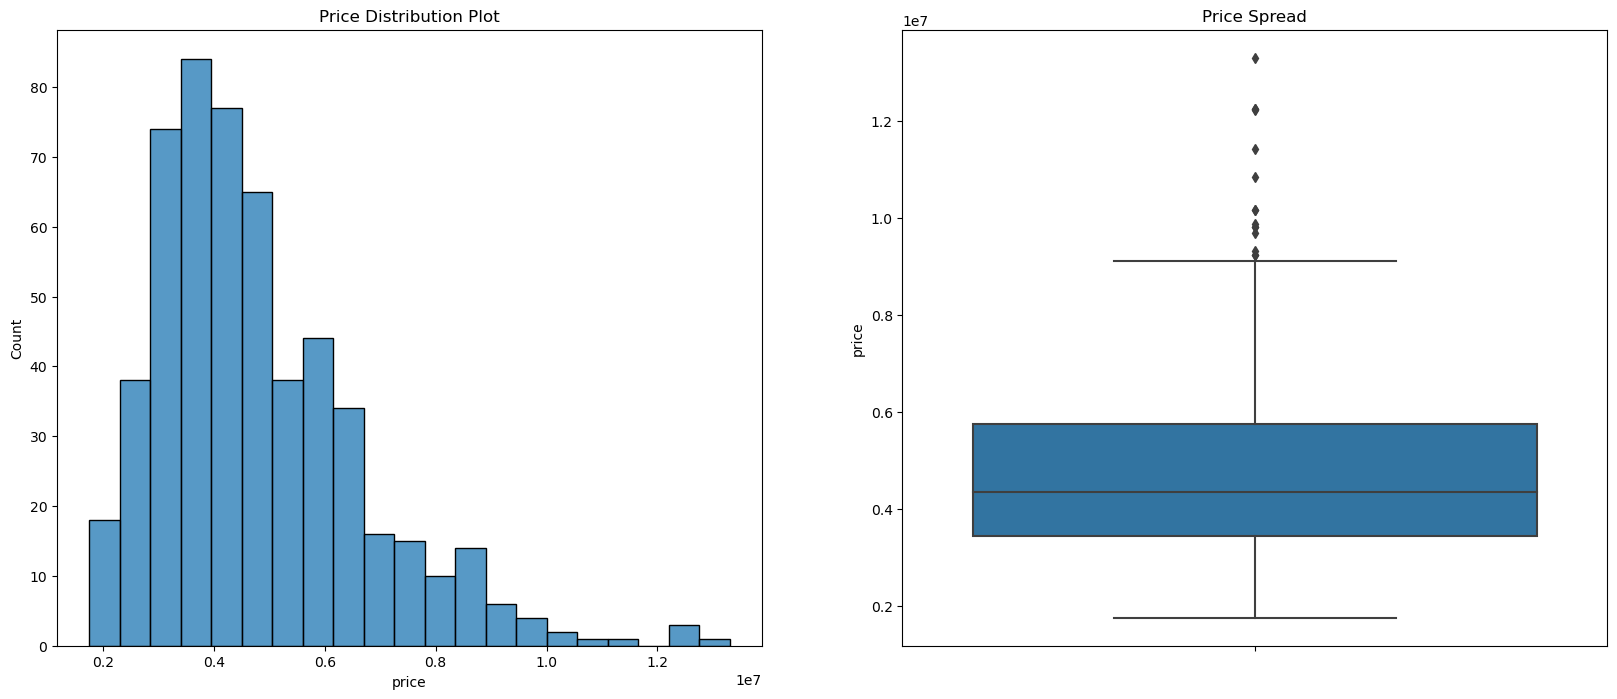

In [94]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Distribution Plot')
sns.histplot(df.price)

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=df.price)

plt.show()

/Users/vidyadharbendre/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


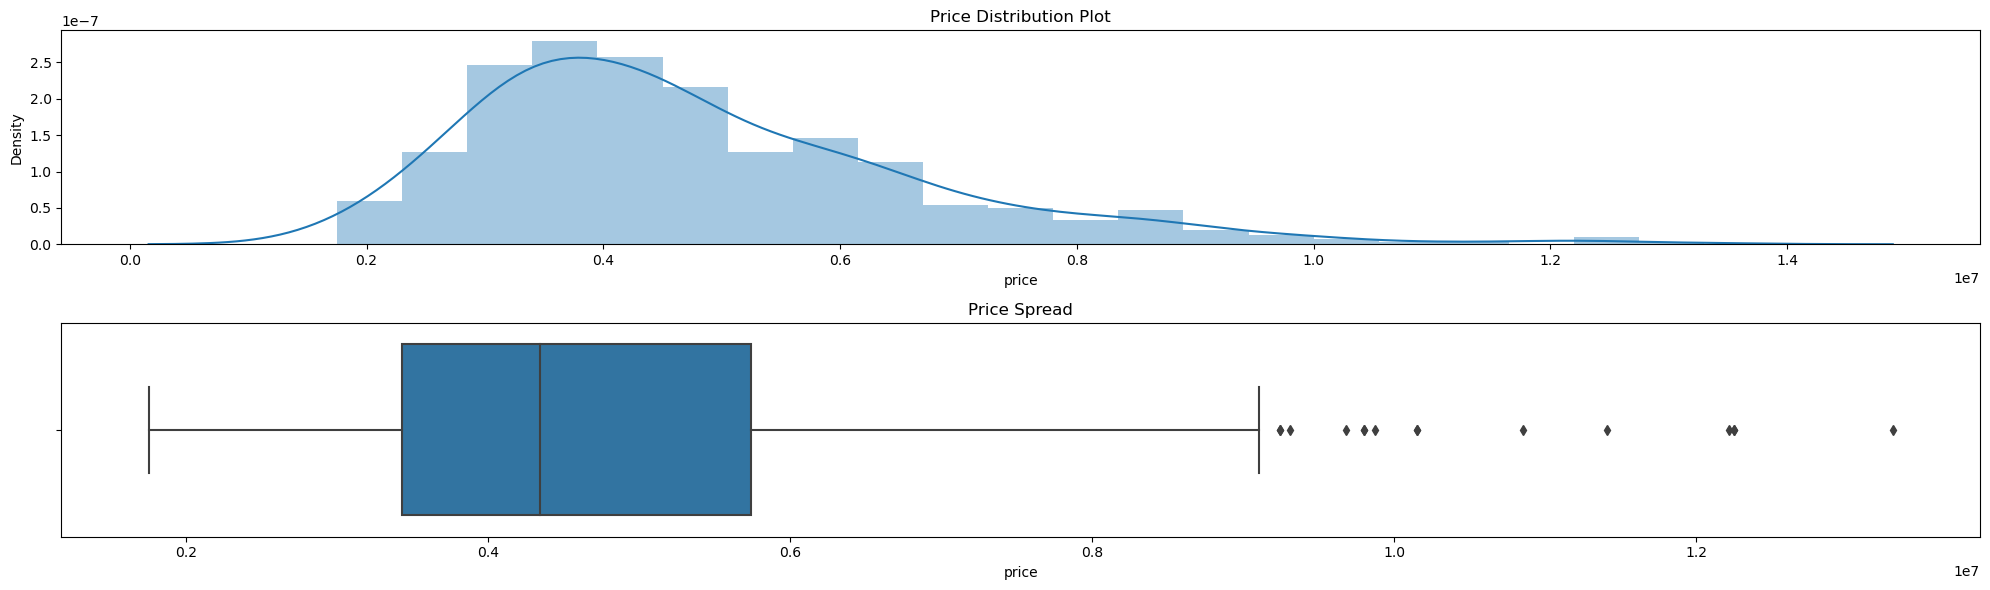

In [95]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Price Spread')
sns.boxplot(x=df.price, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

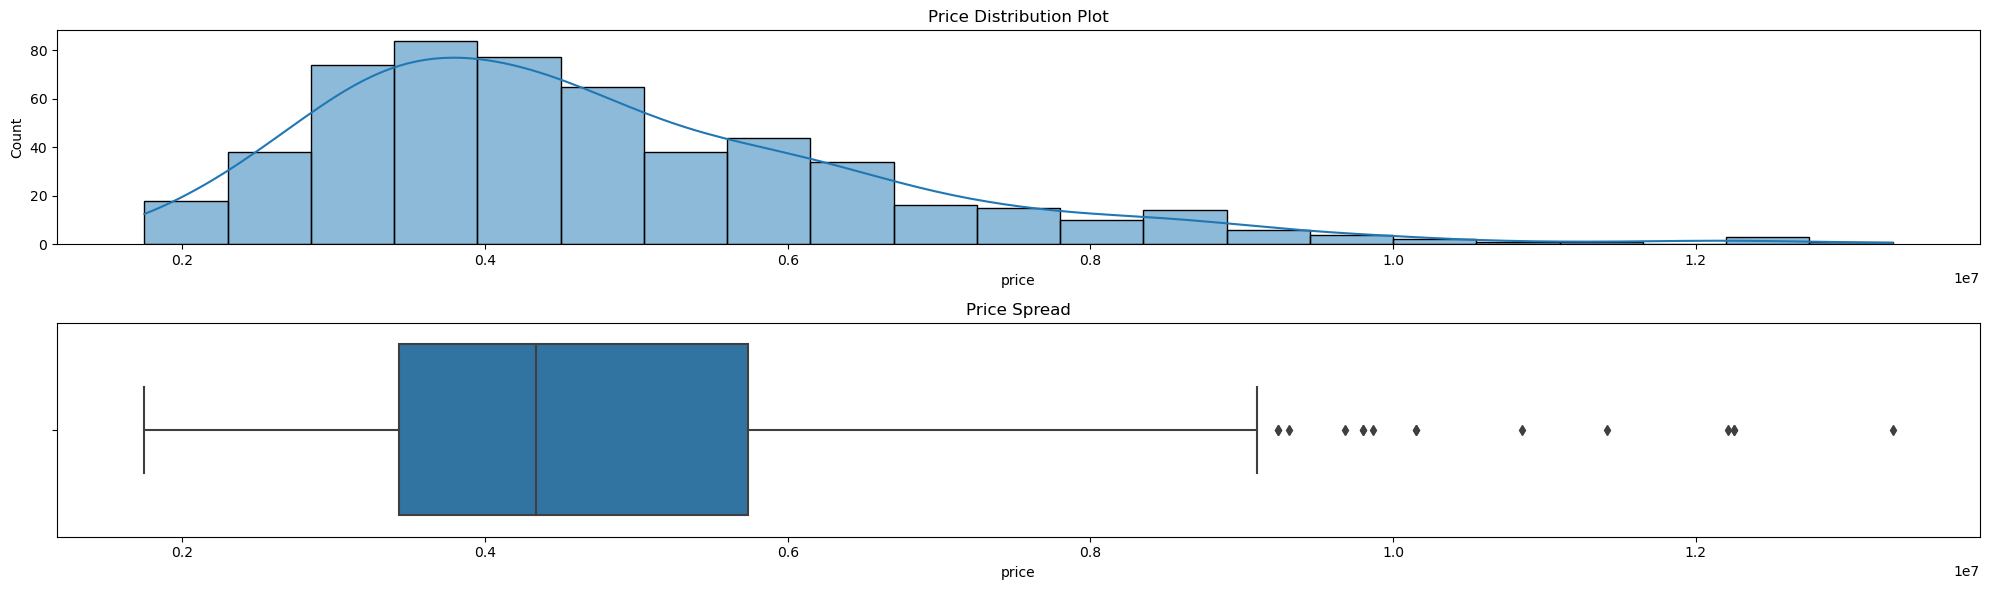

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))

plt.subplot(2,1,1)  # Create two rows, one column, and select the first subplot
plt.title('Price Distribution Plot')
sns.histplot(df.price, kde=True)

plt.subplot(2,1,2)  # Create two rows, one column, and select the second subplot
plt.title('Price Spread')
sns.boxplot(x=df.price, orient="h")

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()


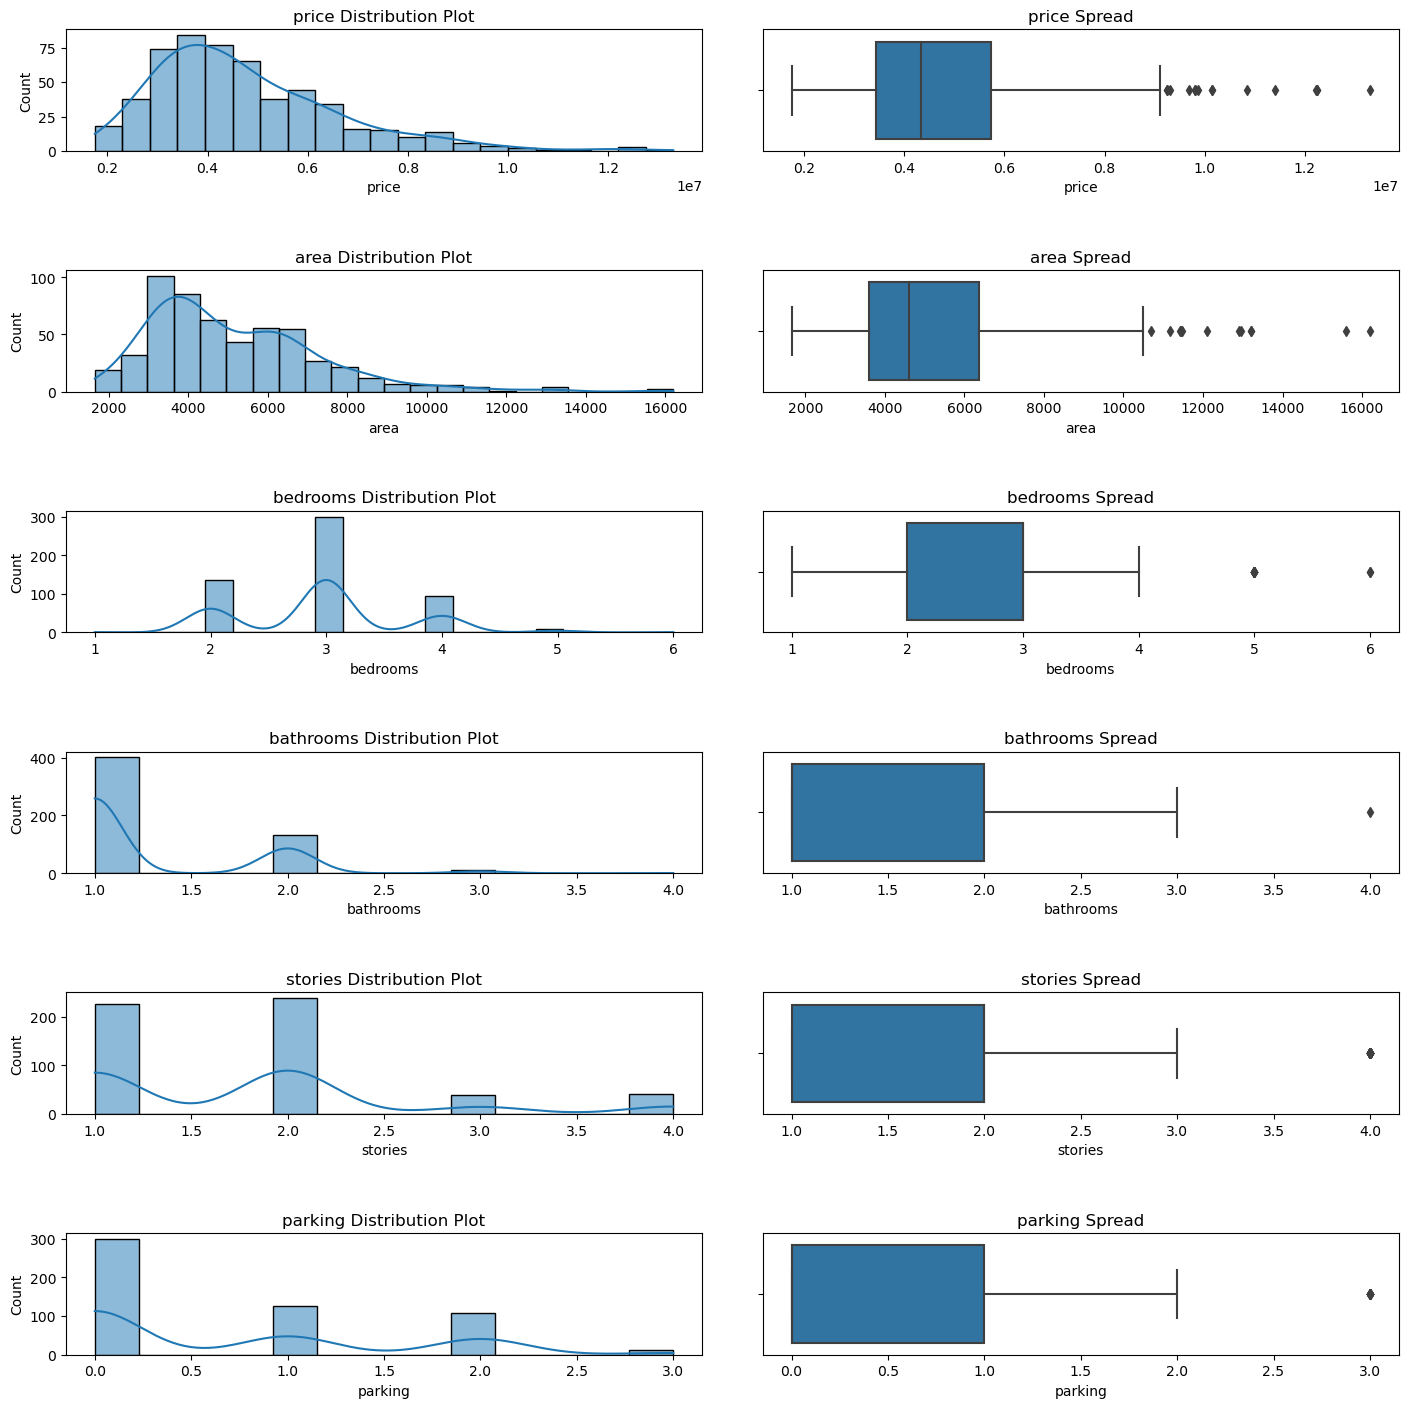

In [97]:
# Determine the number of rows and columns for subplots based on the number of numeric columns
n_rows = len(df_num.columns)
n_cols = 2  # Two plots per column (histogram and box plot)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

# Iterate over the numeric columns and their corresponding subplots
for i, column in enumerate(df_num.columns):
    sns.histplot(df[column], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{column} Distribution Plot')
    
    sns.boxplot(x=df[column], ax=axes[i, 1])
    axes[i, 1].set_title(f'{column} Spread')

plt.tight_layout(pad=4.0)
plt.show()

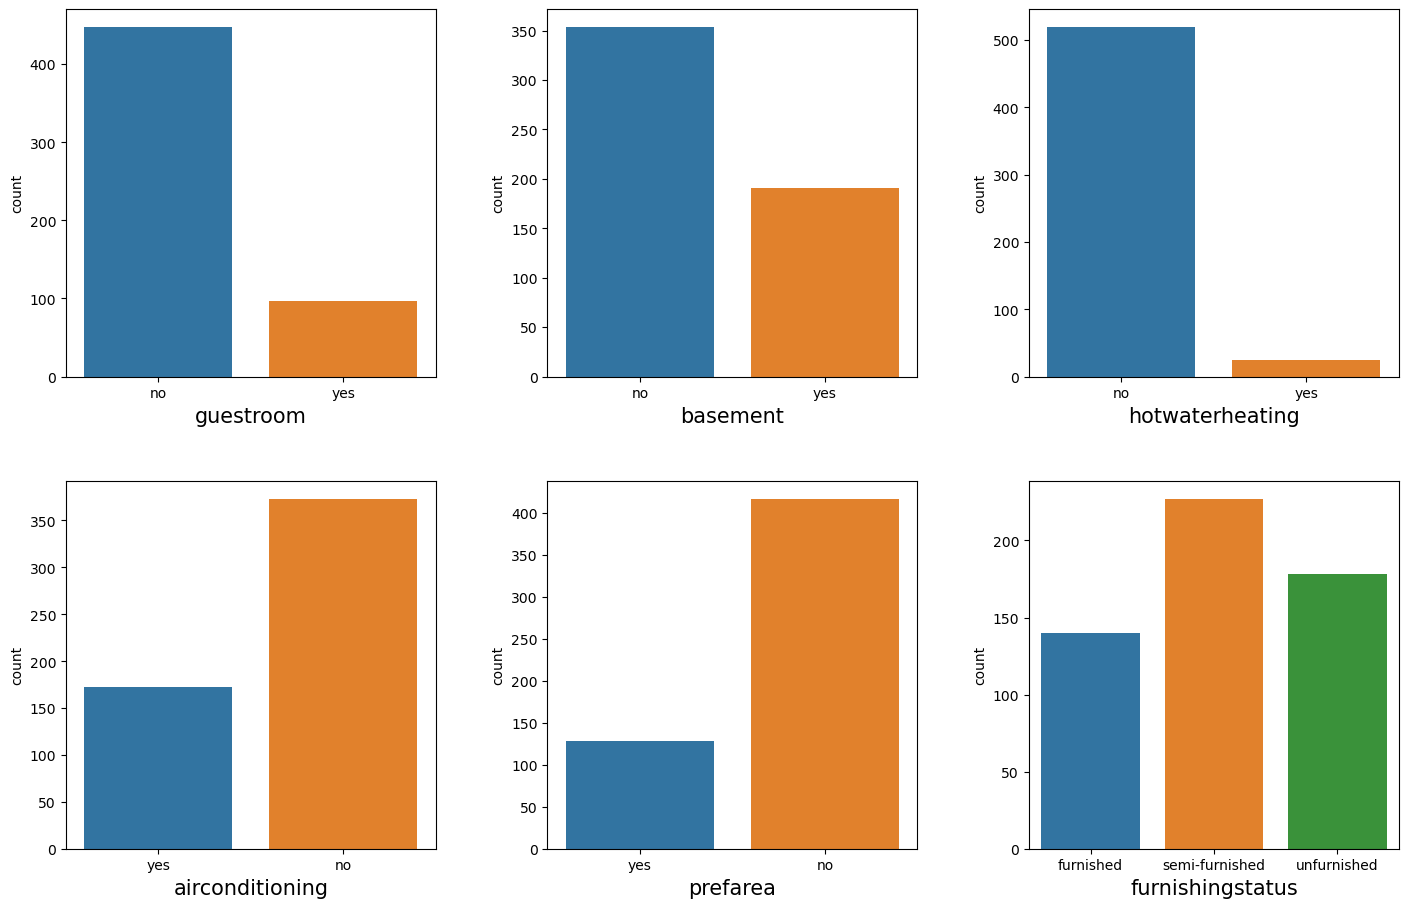

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get a list of categorical variables from the DataFrame
categorical_variables = df_cat.columns[1:]

# Calculate the number of rows and columns for subplots
num_rows = 2
num_cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate over categorical variables and their corresponding subplots
for variable, subplot in zip(categorical_variables, axes.flatten()):
    sns.countplot(data=df, x=variable, ax=subplot)
    subplot.set_xticklabels(subplot.get_xticklabels())
    subplot.set_xlabel(variable, fontsize=15)

plt.tight_layout(pad=4.0)
plt.show()


In [99]:
# use skew() to calculate the skewness
skew = df.skew(numeric_only=True)

# print the skewness
print(skew)

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64


In [101]:
# use kurt() to calculate the kurtosis
df.kurt(numeric_only=True)

price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64

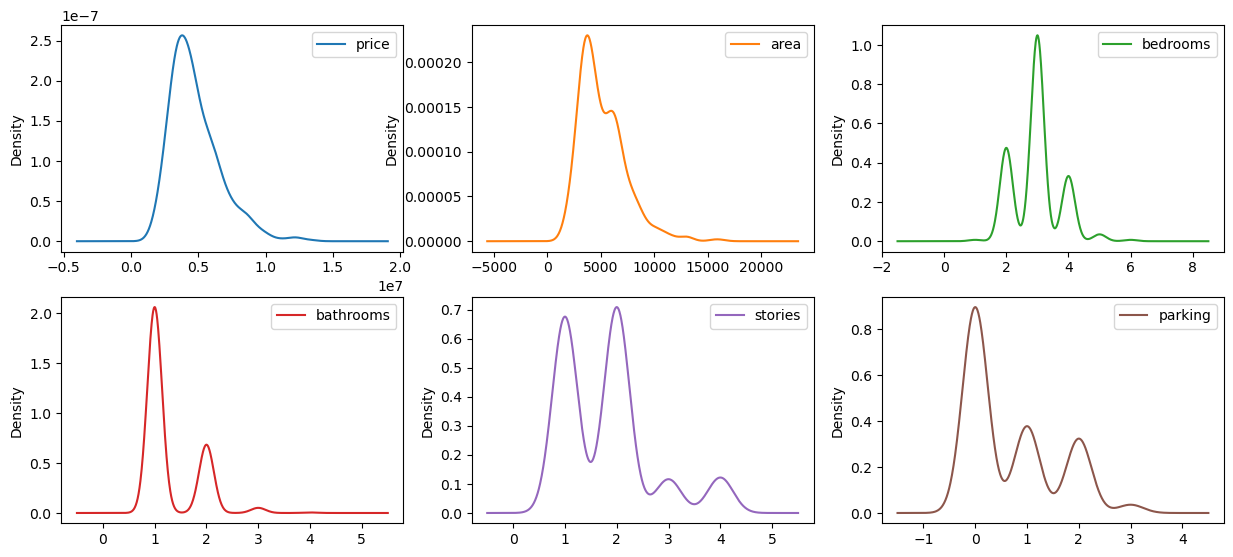

In [102]:
# set plot size
plt.rcParams["figure.figsize"] = [15,10]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)

# show plot
plt.show()

In [103]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

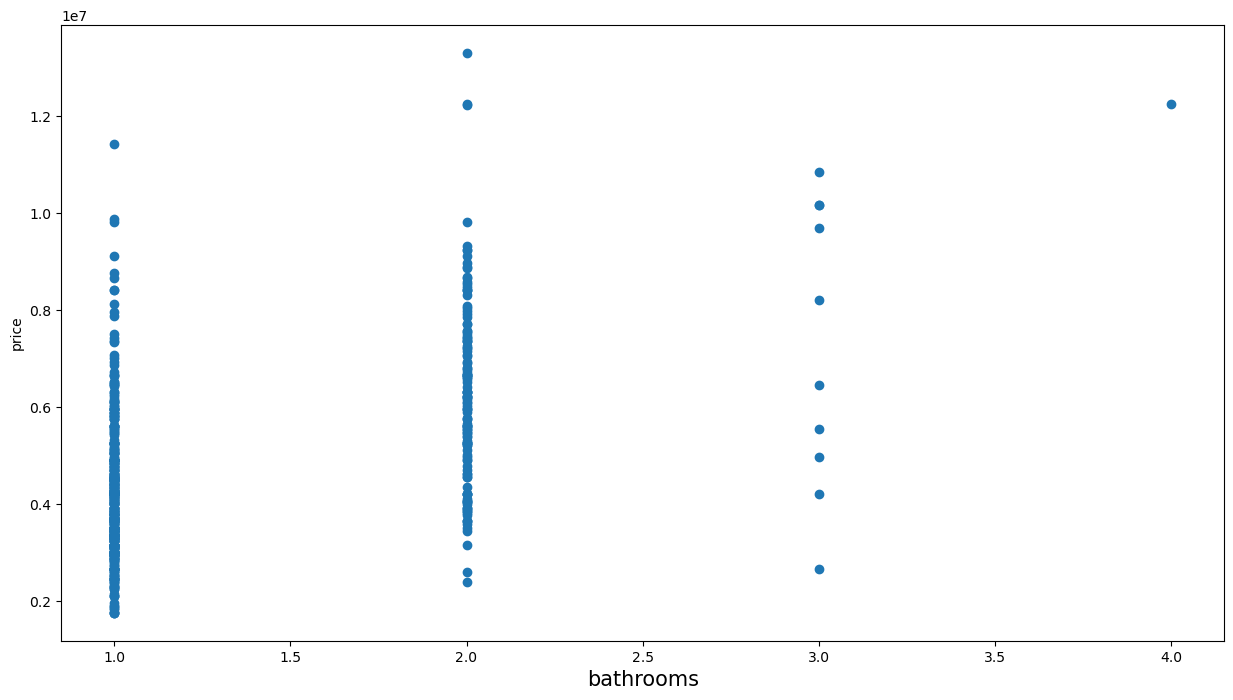

In [104]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["bathrooms"], df["price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("bathrooms", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('price')
plt.show()

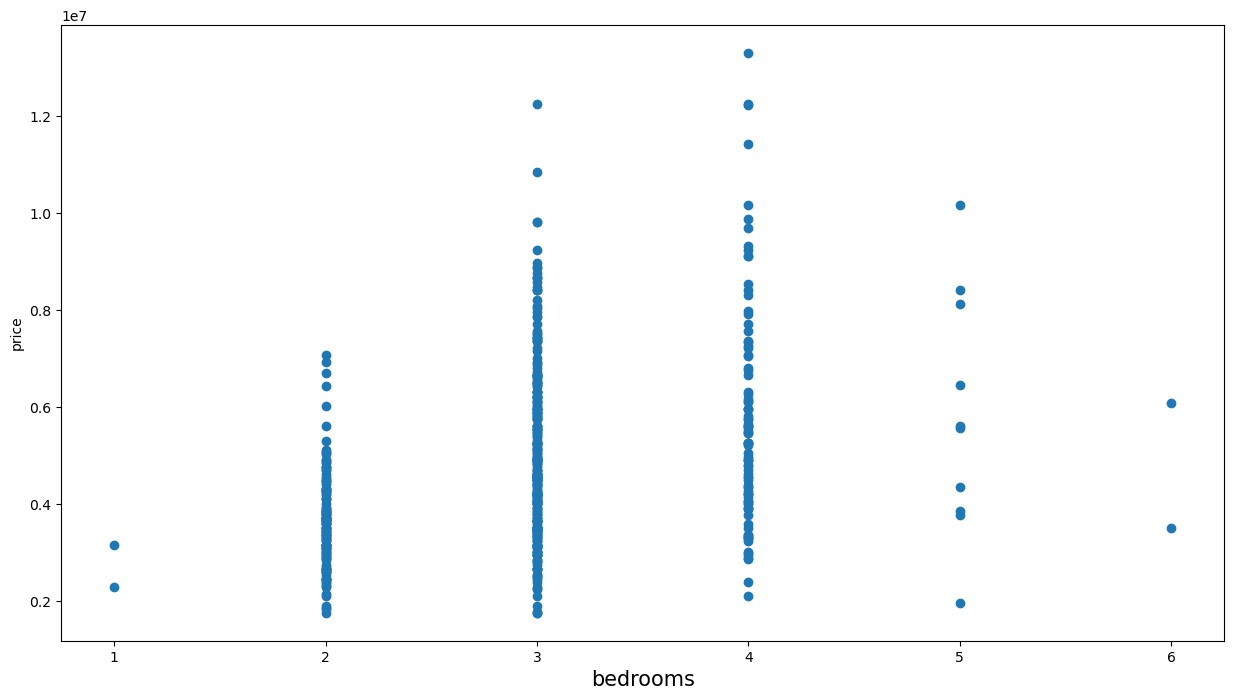

In [105]:
# initialize the figure 
# figsize: set the plot size
fig, ax = plt.subplots(figsize=(15,8))

# plot the scatter plot
ax.scatter(df["bedrooms"], df["price"])

# set the x-axis label
# fontsize: set the font size of the label
ax.set_xlabel("bedrooms", fontsize = 15)

# set the y-axis label
# fontsize: set the font size of the label
ax.set_ylabel('price')
plt.show()

In [106]:
# Display shape of the dataset
print(data.shape)

NameError: name 'data' is not defined

In [108]:
# Do type casting and impute missing values - mean/median and mode (categorical)

In [109]:
# skew - -0.5 to +0.5 - acceptance

In [111]:
df.skew(numeric_only=True)

price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

In [112]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [113]:
df.price.describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

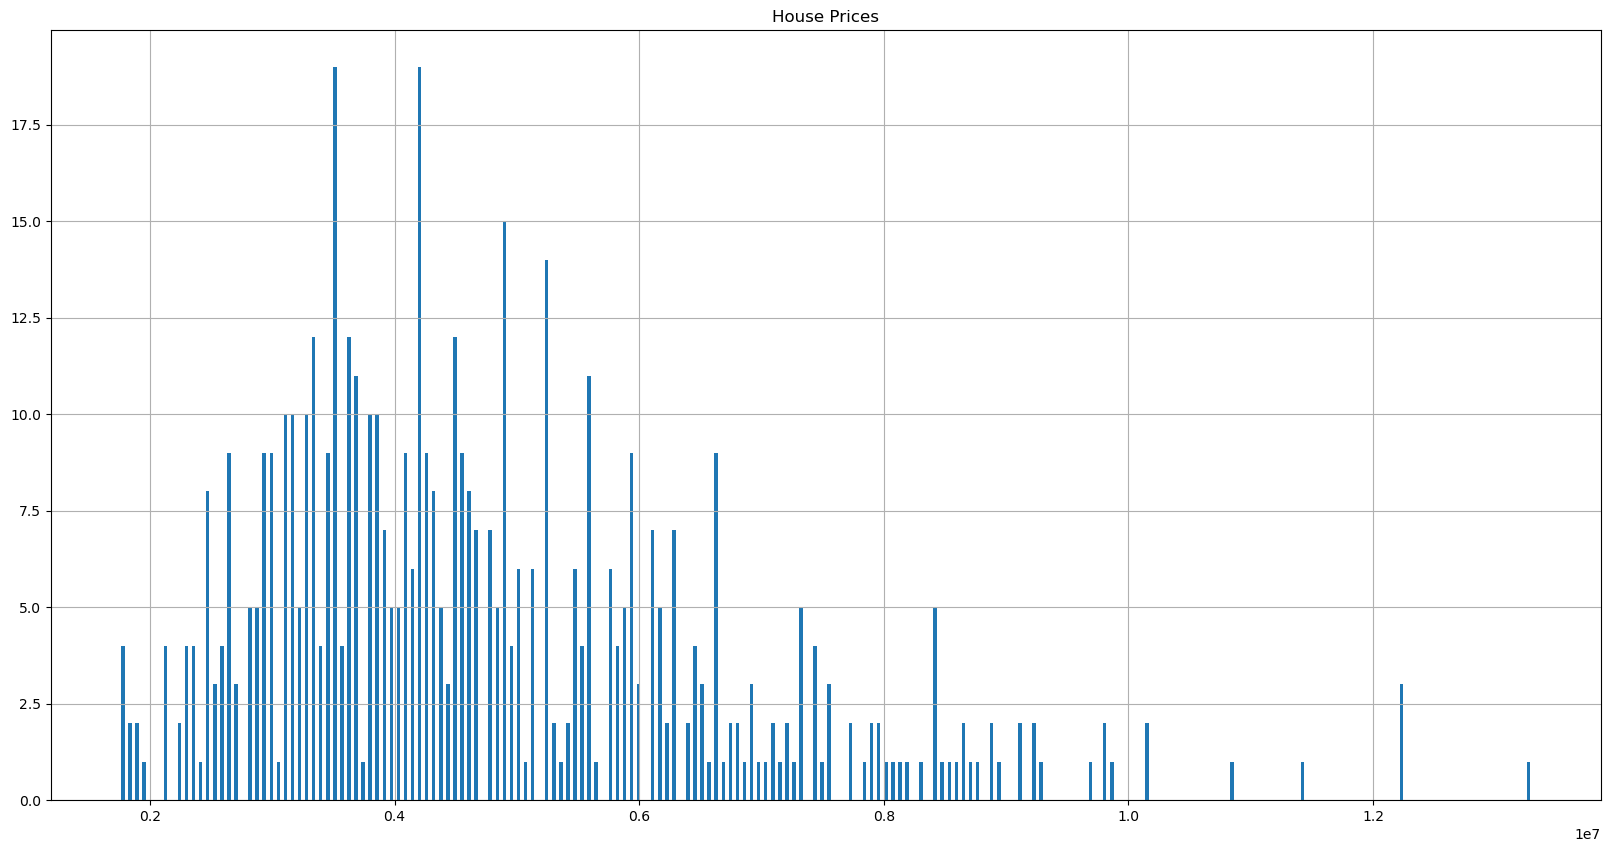

In [114]:
df['price'].hist(bins=200,rwidth = 0.5,figsize=(20,10))
plt.title('House Prices')
plt.show()